### Import necessary packages

In [1]:
from shapely.geometry import Point, LineString
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

### Goal: plot the LineStrings of those counties that have traffic on i24, one of the main interstates in MiddleTN.

#### Those counties are:
                - Cheatham
                - Davidson
                - Montgomery
                - Robertson
                - Rutherford

#### Let's do this alphabetically...

### First, create the map on which all the points shall be plotted.

In [2]:
x = -86.78069                                                          # create the map on which all the points will be plotted
y = 36.14848
area_center = [y, x]
i24_map = folium.Map(location =  area_center, zoom_start = 10.0)

In [3]:
x = -86.78069                                                          # create the map on which all the points will be plotted
y = 36.14848
area_center = [y, x]
test_map = folium.Map(location =  area_center, zoom_start = 10.0)

### Second, create Cheatham County i24 LineStrings

In [4]:
cheatham1 = pd.read_excel('../data/cheatham2020.xlsx', skiprows = 11)                   # read in the excel file.
cheatham1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
cheatham = cheatham1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]


In [5]:
cheatham1

,Loc ID,County,Community,Functional Class,Rural Urban,On,From,To,Approach,At,Dir,Directions,Category,LRS ID,LRS Loc Pt,Latitude,Longitude,AADT,Latest Date
0,11000001,Cheatham,-,Major Collector,R,US-41A,NaN,NaN,NaN,NEAR MONTGOMERY CO LINE,2-WAY,NB/SB,CC,11SR112003,1.498,36.448778,-87.115809,6121,2/25/2021
1,11000001R,Cheatham,-,NaN,R,I0040,NaN,NaN,NaN,0188A,RAMP,NaN,RP,11I0040001,0.120,36.082855,-87.099239,2472,2021-03-03 00:00:00
2,11000002R,Cheatham,-,NaN,R,I0040,NaN,NaN,NaN,0188B,RAMP,NaN,RP,11I0040001,0.092,36.083568,-87.095711,6410,2021-01-03 00:00:00
3,11000003,Cheatham,-,Minor Arterial,R,SR-12,NaN,NaN,NaN,NEAR MONTGOMERY CO LINE,2-WAY,NaN,CC,11SR012001,20.413,36.407185,-87.203832,4354,2/25/2021
4,11000003R,Cheatham,-,NaN,R,I0040,NaN,NaN,NaN,0188C,RAMP,NaN,RP,11I0040001,0.117,36.084370,-87.096816,5261,2021-01-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,11000068,Cheatham,ASHLAND CITY,Major Collector,R,TENNESSEE WALTZ PKWY.,NaN,NaN,NaN,ASHLAND CITY,2-WAY,NB/SB,CC,11SR455001,0.864,36.268270,-87.067980,7682,2021-02-03 00:00:00
65,11000070,Cheatham,KINGSTON SPRINGS,Major Collector,R,LUYBEN HILLS RD.,NaN,NaN,NaN,KINGSTON SPRINGS,2-WAY,NB/SB,CC,11SR249001,0.167,36.085438,-87.099879,9102,2021-01-03 00:00:00
66,11000071,Cheatham,-,Minor Arterial,R,SR-49,NaN,NaN,NaN,ON CUMBERLAND RIVER BRDG,2-WAY,EB/WB,CC,11SR049002,4.972,36.270333,-87.077971,9918,2021-02-03 00:00:00
67,11000074,Cheatham,-,Minor Collector,R,POND CREEK RD.,NaN,NaN,NaN,NEAR DAVIDSON COUNTY LINE,2-WAY,NaN,CC,1101939001,1.289,36.201038,-86.997278,932,2021-03-03 00:00:00


### Add the LineString to the already created i24 map.

In [6]:
i24cheatham = cheatham.loc[(cheatham['On'] == 'I-24') | (cheatham['On'] == 'I0024')]   # locate both i24 and i24 ramp (I0024).
i24cheatham = i24cheatham.sort_values(by = 'Latitude', ascending = False)                                 # sort values by lat for LineString.

i24cheatham['geometry'] =i24cheatham.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)
i24cheatham['line'] = LineString(i24cheatham.geometry.tolist())                        # create line column which concats all
i24cheatham_geo = gpd.GeoDataFrame(i24cheatham,                                        # points together for linestring.
                           crs = "EPSG:4326",
                           geometry = i24cheatham['geometry'])
i24cheatham                                                                            # hopefully it gives no trouble

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line
49,11000052,Cheatham,I-24,NEAR ROBERTSON CO LINE,2-WAY,EB/WB,36.357365,-86.946698,56621,2020-01-01 00:00:00,POINT (-86.94670 36.35737),"LINESTRING (-86.946698 36.357365, -86.93221285..."
14,11000008R,Cheatham,I0024,0031D,RAMP,NaN,36.350035,-86.932213,1948,2/24/2021,POINT (-86.93221 36.35004),"LINESTRING (-86.946698 36.357365, -86.93221285..."
8,11000005R,Cheatham,I0024,0031A,RAMP,NaN,36.349091,-86.933788,1981,2/24/2021,POINT (-86.93379 36.34909),"LINESTRING (-86.946698 36.357365, -86.93221285..."
12,11000007R,Cheatham,I0024,0031C,RAMP,NaN,36.347742,-86.928807,585,2020-01-01 00:00:00,POINT (-86.92881 36.34774),"LINESTRING (-86.946698 36.357365, -86.93221285..."
10,11000006R,Cheatham,I0024,0031B,RAMP,NaN,36.346746,-86.930224,2795,2/24/2021,POINT (-86.93022 36.34675),"LINESTRING (-86.946698 36.357365, -86.93221285..."


In [7]:
cheatham_line = i24cheatham.line[10]                                # take only one iteration of the line

In [8]:
folium.GeoJson(cheatham_line).add_to(i24_map)                       # add the line to the map

In [9]:
i24_map

#### Rinse and repeat the above steps with the remaining counties.

### Create Davidson County i24 LineStrings

In [10]:
davidson1 = pd.read_excel('../data/davidson2020.xlsx', skiprows = 11)                   # read in the excel file.
davidson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
davidson = davidson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]
davidson['On'].unique()

array(['SPRINGFIELD HWY.', 'I0040', 'OLD SPRINGFIELD PK.',
       'WHITES CREEK PK.', 'CLARKSVILLE PK.', 'OLD HICKORY BLVD.',
       'EATONS CREEK RD.', 'LICKTON PK.', 'DICKERSON PK.',
       'RIVERGATE PKWY.', 'GALLATIN PK.', 'NEELYS BEND RD.',
       'DUE WEST AVE.', 'ASHLAND CITY HWY.', 'BUENA VISTA PK.',
       'BAPTIST WORLD CENTER DR.', 'BRICK CHURCH PK.', 'W. TRINITY LN.',
       'E. TRINITY LN.', 'WOODLAND ST.', 'SHUTE LN.', 'LEBANON PK.',
       'CENTRAL PK.', 'ROSA L. PARKS BLVD.', 'CENTENNIAL BLVD.',
       'CHARLOTTE PK.', 'I0024', 'WHITE BRIDGE RD.', 'ANNEX AVE.',
       'WOODMONT BLVD.', 'BELLE MEADE BLVD.', 'HARDING RD.', 'MURPHY RD.',
       'WEST END AVE.', 'BROADWAY', 'DEMONBREUN ST.', 'JEFFERSON ST.',
       'JAMES ROBERTSON PKWY.', 'HERMITAGE AVE.', 'FESSLERS LN.',
       'STEWARTS FERRY PK.', 'DONELSON PK.', 'ELM HILL PK.',
       'LAFAYETTE ST.', '2ND AVE. S.', '4TH AVE. S.', '8TH AVE. S.',
       'NOLENSVILLE PK.', 'FOSTER AVE.', 'I0065', 'THOMPSON LN.',
       '

In [11]:
i24davidson = davidson.loc[(davidson['On'] == 'I-24') | (davidson['On'] == 'I0024')]    # locate both i24 and i24 ramp (I0024).
i24davidson = i24davidson.sort_values(by = 'Latitude', ascending = False)                                    # sort values by lat for LineString.

i24davidson['geometry'] =i24davidson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)
i24davidson['line'] = LineString(i24davidson.geometry.tolist())                        # create line column which concats all
i24davidson_geo = gpd.GeoDataFrame(i24davidson,                                        # points together for linestring.
                           crs = "EPSG:4326",
                           geometry = i24davidson['geometry'])
i24davidson                                                                            # hopefully it gives no trouble

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line
822,79,Davidson,I0024,NEAR CHEATHAM CO LINE,2-WAY,EB/WB,36.339470,-86.917089,54785,10/22/2021,POINT (-86.91709 36.33947),"LINESTRING (-86.917089 36.33947, -86.871023250..."
606,19000431R,Davidson,I0024,0035D,RAMP,NaN,36.325264,-86.871023,1293,2021-02-02 00:00:00,POINT (-86.87102 36.32526),"LINESTRING (-86.917089 36.33947, -86.871023250..."
604,19000430R,Davidson,I0024,0035C,RAMP,NaN,36.324811,-86.865431,5686,2021-02-02 00:00:00,POINT (-86.86543 36.32481),"LINESTRING (-86.917089 36.33947, -86.871023250..."
602,19000429R,Davidson,I0024,0035B,RAMP,NaN,36.323752,-86.870090,5349,2021-02-02 00:00:00,POINT (-86.87009 36.32375),"LINESTRING (-86.917089 36.33947, -86.871023250..."
601,19000428R,Davidson,I0024,0035A,RAMP,NaN,36.323686,-86.871084,1131,2021-02-02 00:00:00,POINT (-86.87108 36.32369),"LINESTRING (-86.917089 36.33947, -86.871023250..."
...,...,...,...,...,...,...,...,...,...,...,...,...
373,19000222,Davidson,I-24,NEAR RUTHERFORD CO LINE,2-WAY,EB/WB,36.033014,-86.641393,144682,2020-01-01 00:00:00,POINT (-86.64139 36.03301),"LINESTRING (-86.917089 36.33947, -86.871023250..."
418,19000287R,Davidson,I0024,0062D,RAMP,NaN,36.016198,-86.621963,12299,3/17/2021,POINT (-86.62196 36.01620),"LINESTRING (-86.917089 36.33947, -86.871023250..."
413,19000284R,Davidson,I0024,0062A,RAMP,NaN,36.015192,-86.621921,11928,3/17/2021,POINT (-86.62192 36.01519),"LINESTRING (-86.917089 36.33947, -86.871023250..."
416,19000286R,Davidson,I0024,0062C,RAMP,NaN,36.014077,-86.619356,9411,3/17/2021,POINT (-86.61936 36.01408),"LINESTRING (-86.917089 36.33947, -86.871023250..."


### Add LineString to map

In [12]:
davidson_line = i24davidson.line[414]                                         # take only one iteration of the line


In [13]:
folium.GeoJson(davidson_line).add_to(i24_map)                                 # add the line to the map

In [14]:
cheatham

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
0,11000001,Cheatham,US-41A,NEAR MONTGOMERY CO LINE,2-WAY,NB/SB,36.448778,-87.115809,6121,2/25/2021
1,11000001R,Cheatham,I0040,0188A,RAMP,NaN,36.082855,-87.099239,2472,2021-03-03 00:00:00
2,11000002R,Cheatham,I0040,0188B,RAMP,NaN,36.083568,-87.095711,6410,2021-01-03 00:00:00
3,11000003,Cheatham,SR-12,NEAR MONTGOMERY CO LINE,2-WAY,NaN,36.407185,-87.203832,4354,2/25/2021
4,11000003R,Cheatham,I0040,0188C,RAMP,NaN,36.084370,-87.096816,5261,2021-01-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...
64,11000068,Cheatham,TENNESSEE WALTZ PKWY.,ASHLAND CITY,2-WAY,NB/SB,36.268270,-87.067980,7682,2021-02-03 00:00:00
65,11000070,Cheatham,LUYBEN HILLS RD.,KINGSTON SPRINGS,2-WAY,NB/SB,36.085438,-87.099879,9102,2021-01-03 00:00:00
66,11000071,Cheatham,SR-49,ON CUMBERLAND RIVER BRDG,2-WAY,EB/WB,36.270333,-87.077971,9918,2021-02-03 00:00:00
67,11000074,Cheatham,POND CREEK RD.,NEAR DAVIDSON COUNTY LINE,2-WAY,NaN,36.201038,-86.997278,932,2021-03-03 00:00:00


In [15]:
i24_map

### Create Montgomery County i24 LineStrings

In [16]:
montgomery = pd.read_excel('../data/montgomery2020.xlsx', skiprows = 11)                   # read in the excel file.
montgomery.rename(columns  = {'Latest' : 'AADT'}, inplace = True)
montgomery = montgomery[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]
i24montgomery = montgomery.loc[(montgomery['On'] == 'I-24') | (montgomery['On'] == 'I0024')]    # locate both i24 and i24 ramp (I0024).
i24montgomery = i24montgomery.sort_values(by = 'Latitude', ascending = False)                                    # sort values by lat for LineString.

i24montgomery['geometry'] =i24montgomery.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)
i24montgomery['line'] = LineString(i24montgomery.geometry.tolist())                        # create line column which concats all
i24montgomery_geo = gpd.GeoDataFrame(i24montgomery,                                        # points together for linestring.
                           crs = "EPSG:4326",
                           geometry = i24montgomery['geometry'])
i24montgomery                                                                            # hopefully it gives no trouble

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line
98,63000104,Montgomery,I-24,NORTHWEST OF SR-48 INTERCHANGE,2-WAY,EB/WB,36.635950,-87.332067,37553,2020-01-01 00:00:00,POINT (-87.33207 36.63595),"LINESTRING (-87.332067 36.63595, -87.318863428..."
6,63000004R,Montgomery,I0024,0001D,RAMP,NaN,36.632136,-87.318863,3292,2021-02-02 00:00:00,POINT (-87.31886 36.63214),"LINESTRING (-87.332067 36.63595, -87.318863428..."
4,63000003R,Montgomery,I0024,0001C,RAMP,NaN,36.630232,-87.314297,9685,2021-02-02 00:00:00,POINT (-87.31430 36.63023),"LINESTRING (-87.332067 36.63595, -87.318863428..."
1,63000001R,Montgomery,I0024,0001A,RAMP,NaN,36.630199,-87.319731,3385,2021-02-02 00:00:00,POINT (-87.31973 36.63020),"LINESTRING (-87.332067 36.63595, -87.318863428..."
2,63000002R,Montgomery,I0024,0001B,RAMP,NaN,36.628215,-87.314986,16457,2021-02-02 00:00:00,POINT (-87.31499 36.62822),"LINESTRING (-87.332067 36.63595, -87.318863428..."
99,63000105,Montgomery,I-24,NORTHWEST OF SR-13 INTERCHANGE,2-WAY,EB/WB,36.620708,-87.301350,54336,2020-01-01 00:00:00,POINT (-87.30135 36.62071),"LINESTRING (-87.332067 36.63595, -87.318863428..."
12,63000008R,Montgomery,I0024,0004D,RAMP,NaN,36.602312,-87.283098,8646,2/23/2021,POINT (-87.28310 36.60231),"LINESTRING (-87.332067 36.63595, -87.318863428..."
7,63000005R,Montgomery,I0024,0004A,RAMP,NaN,36.601321,-87.285241,7890,2/23/2021,POINT (-87.28524 36.60132),"LINESTRING (-87.332067 36.63595, -87.318863428..."
11,63000007R,Montgomery,I0024,0004C,RAMP,NaN,36.598549,-87.279768,8284,2/23/2021,POINT (-87.27977 36.59855),"LINESTRING (-87.332067 36.63595, -87.318863428..."
9,63000006R,Montgomery,I0024,0004B,RAMP,NaN,36.597457,-87.281566,7198,2021-09-02 00:00:00,POINT (-87.28157 36.59746),"LINESTRING (-87.332067 36.63595, -87.318863428..."


In [17]:
i24montgomery.shape

(20, 12)

### Add LineString to map

In [18]:
montgomery_line = i24montgomery.line[23]                            # take only one iteration of the line

In [19]:
folium.GeoJson(montgomery_line).add_to(i24_map)                    # add the line to the map

In [20]:
i24_map

### Create Robertson County i24 Line

In [21]:
robertson = pd.read_excel('../data/robertson2020.xlsx', skiprows = 11)                   # read in the excel file.
robertson.rename(columns  = {'Latest' : 'AADT'}, inplace = True)
robertson = robertson[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]
i24robertson = robertson.loc[(robertson['On'] == 'I-24') | (robertson['On'] == 'I0024')]    # locate both i24 and i24 ramp (I0024).
i24robertson = i24robertson.sort_values(by = 'Latitude', ascending = False)                                    # sort values by lat for LineString.

i24robertson['geometry'] =i24robertson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)
i24robertson['line'] = LineString(i24robertson.geometry.tolist())                        # create line column which concats all
i24robertson_geo = gpd.GeoDataFrame(i24robertson,                                        # points together for linestring.
                           crs = "EPSG:4326",
                           geometry = i24robertson['geometry'])
i24robertson                                                                            # hopefully it gives no trouble

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line
104,74000108,Robertson,I-24,NEAR MONTGOMERY CO LINE,2-WAY,EB/WB,36.461941,-87.117872,55227,2020-01-01 00:00:00,POINT (-87.11787 36.46194),"LINESTRING (-87.11787200000001 36.461941, -87...."
31,74000020R,Robertson,I0024,0019D,RAMP,NaN,36.452547,-87.101305,1043,2021-05-04 00:00:00,POINT (-87.10131 36.45255),"LINESTRING (-87.11787200000001 36.461941, -87...."
26,74000017R,Robertson,I0024,0019A,RAMP,NaN,36.450823,-87.102292,1117,2021-05-04 00:00:00,POINT (-87.10229 36.45082),"LINESTRING (-87.11787200000001 36.461941, -87...."
29,74000019R,Robertson,I0024,0019C,RAMP,NaN,36.449677,-87.096640,2349,2021-05-04 00:00:00,POINT (-87.09664 36.44968),"LINESTRING (-87.11787200000001 36.461941, -87...."
27,74000018R,Robertson,I0024,0019B,RAMP,NaN,36.447926,-87.097591,2576,2021-05-04 00:00:00,POINT (-87.09759 36.44793),"LINESTRING (-87.11787200000001 36.461941, -87...."
105,74000109,Robertson,I-24,B\N SR-49 & SR-256 INTERCHANGE,2-WAY,EB/WB,36.425555,-87.062838,69342,2020-01-01 00:00:00,POINT (-87.06284 36.42556),"LINESTRING (-87.11787200000001 36.461941, -87...."
38,74000024R,Robertson,I0024,0024D,RAMP,NaN,36.404439,-87.026693,5571,2021-05-04 00:00:00,POINT (-87.02669 36.40444),"LINESTRING (-87.11787200000001 36.461941, -87...."
32,74000021R,Robertson,I0024,0024A,RAMP,NaN,36.403032,-87.028634,5155,2021-05-04 00:00:00,POINT (-87.02863 36.40303),"LINESTRING (-87.11787200000001 36.461941, -87...."
36,74000023R,Robertson,I0024,0024C,RAMP,NaN,36.401366,-87.021587,4186,2021-05-04 00:00:00,POINT (-87.02159 36.40137),"LINESTRING (-87.11787200000001 36.461941, -87...."
34,74000022R,Robertson,I0024,0024B,RAMP,NaN,36.399906,-87.023454,4300,2021-05-04 00:00:00,POINT (-87.02345 36.39991),"LINESTRING (-87.11787200000001 36.461941, -87...."


### Add LineString to map

In [22]:
robertson_line = i24robertson.line[26]                           # take only one iteration of the line

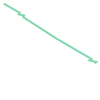

In [23]:
robertson_line

In [24]:
folium.GeoJson(robertson_line).add_to(i24_map)                   # add the line to the map

In [25]:
i24_map

### Create Rutherford County i24 Line

In [26]:
rutherford = pd.read_excel('../data/rutherford2020.xlsx', skiprows = 11)                   # read in the excel file.
rutherford.rename(columns  = {'Latest' : 'AADT'}, inplace = True)
rutherford = rutherford[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]
i24rutherford = rutherford.loc[(rutherford['On'] == 'I-24') | (rutherford['On'].str.contains('I0024'))]    # locate both i24 and i24 ramp (I0024).
i24rutherford = i24rutherford.sort_values(by = 'Latitude', ascending = False)                                    # sort values by lat for LineString.

i24rutherford['geometry'] =i24rutherford.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)
i24rutherford['line'] = LineString(i24rutherford.geometry.tolist())                        # create line column which concats all
i24rutherford_geo = gpd.GeoDataFrame(i24rutherford,                                        # points together for linestring.
                           crs = "EPSG:4326",
                           geometry = i24rutherford['geometry'])
i24rutherford

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line
145,75000122,Rutherford,I-24,NEAR DAVIDSON CO LINE,2-WAY,EB/WB,36.003085,-86.608126,131512,2020-01-01 00:00:00,POINT (-86.60813 36.00308),"LINESTRING (-86.608126 36.003085, -86.59893645..."
12,75000004R,Rutherford,I0024,0064D,RAMP,NaN,35.997371,-86.598936,15033,11/15/2021,POINT (-86.59894 35.99737),"LINESTRING (-86.608126 36.003085, -86.59893645..."
10,75000003R,Rutherford,I0024,0064C,RAMP,NaN,35.995019,-86.594665,11800,11/15/2021,POINT (-86.59466 35.99502),"LINESTRING (-86.608126 36.003085, -86.59893645..."
8,75000002R,Rutherford,I0024,0064A,RAMP,NaN,35.993687,-86.595360,18598,11/15/2021,POINT (-86.59536 35.99369),"LINESTRING (-86.608126 36.003085, -86.59893645..."
6,75000001R,Rutherford,I0024,0064B,RAMP,NaN,35.992760,-86.594084,12013,11/15/2021,POINT (-86.59408 35.99276),"LINESTRING (-86.608126 36.003085, -86.59893645..."
128,75000104,Rutherford,I-24,WEST SMYRNA,2-WAY,EB/WB,35.978976,-86.575075,132455,2020-01-01 00:00:00,POINT (-86.57507 35.97898),"LINESTRING (-86.608126 36.003085, -86.59893645..."
22,75000009R,Rutherford,I0024,0066E,RAMP,NaN,35.977333,-86.571354,15082,11/15/2021,POINT (-86.57135 35.97733),"LINESTRING (-86.608126 36.003085, -86.59893645..."
14,75000005R,Rutherford,I0024,0066A,RAMP,NaN,35.976689,-86.574108,3324,11/15/2021,POINT (-86.57411 35.97669),"LINESTRING (-86.608126 36.003085, -86.59893645..."
18,75000007R,Rutherford,I0024,0066B,RAMP,NaN,35.973673,-86.571267,13098,11/15/2021,POINT (-86.57127 35.97367),"LINESTRING (-86.608126 36.003085, -86.59893645..."
20,75000008R,Rutherford,I0024,0066D,RAMP,NaN,35.973591,-86.569310,11529,2021-08-11 00:00:00,POINT (-86.56931 35.97359),"LINESTRING (-86.608126 36.003085, -86.59893645..."


### Add LineString to map

In [27]:
rutherford_line = i24rutherford.line[6]                            # take only one iteration of the line

In [28]:
folium.GeoJson(rutherford_line).add_to(i24_map)                    # add the line to the map

In [29]:
i24_map

## Make one DF out of all combined I24 LineStrings

In [30]:
i24 = pd.concat([i24montgomery,i24robertson,i24cheatham,i24davidson,i24rutherford], axis = 0)
i24

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line
98,63000104,Montgomery,I-24,NORTHWEST OF SR-48 INTERCHANGE,2-WAY,EB/WB,36.635950,-87.332067,37553,2020-01-01 00:00:00,POINT (-87.33207 36.63595),"LINESTRING (-87.332067 36.63595, -87.318863428..."
6,63000004R,Montgomery,I0024,0001D,RAMP,NaN,36.632136,-87.318863,3292,2021-02-02 00:00:00,POINT (-87.31886 36.63214),"LINESTRING (-87.332067 36.63595, -87.318863428..."
4,63000003R,Montgomery,I0024,0001C,RAMP,NaN,36.630232,-87.314297,9685,2021-02-02 00:00:00,POINT (-87.31430 36.63023),"LINESTRING (-87.332067 36.63595, -87.318863428..."
1,63000001R,Montgomery,I0024,0001A,RAMP,NaN,36.630199,-87.319731,3385,2021-02-02 00:00:00,POINT (-87.31973 36.63020),"LINESTRING (-87.332067 36.63595, -87.318863428..."
2,63000002R,Montgomery,I0024,0001B,RAMP,NaN,36.628215,-87.314986,16457,2021-02-02 00:00:00,POINT (-87.31499 36.62822),"LINESTRING (-87.332067 36.63595, -87.318863428..."
...,...,...,...,...,...,...,...,...,...,...,...,...
68,75000044R,Rutherford,I0024,0089D,RAMP,NaN,35.723485,-86.320947,4830,2021-08-11 00:00:00,POINT (-86.32095 35.72349),"LINESTRING (-86.608126 36.003085, -86.59893645..."
63,75000041R,Rutherford,I0024,0089A,RAMP,NaN,35.722929,-86.322402,4848,2021-08-11 00:00:00,POINT (-86.32240 35.72293),"LINESTRING (-86.608126 36.003085, -86.59893645..."
64,75000042R,Rutherford,I0024,0089B,RAMP,NaN,35.722478,-86.321750,3085,2021-08-11 00:00:00,POINT (-86.32175 35.72248),"LINESTRING (-86.608126 36.003085, -86.59893645..."
66,75000043R,Rutherford,I0024,0089C,RAMP,NaN,35.721609,-86.319380,2478,2021-08-11 00:00:00,POINT (-86.31938 35.72161),"LINESTRING (-86.608126 36.003085, -86.59893645..."


In [31]:
i24.reset_index(inplace = True)

In [32]:
i24['County'].unique()

array(['Montgomery', 'Robertson', 'Cheatham', 'Davidson', 'Rutherford'],
      dtype=object)

In [33]:
i24['line string'] = LineString(i24.geometry.tolist())
i24

,index,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line,line string
0,98,63000104,Montgomery,I-24,NORTHWEST OF SR-48 INTERCHANGE,2-WAY,EB/WB,36.635950,-87.332067,37553,2020-01-01 00:00:00,POINT (-87.33207 36.63595),"LINESTRING (-87.332067 36.63595, -87.318863428...","LINESTRING (-87.332067 36.63595, -87.318863428..."
1,6,63000004R,Montgomery,I0024,0001D,RAMP,NaN,36.632136,-87.318863,3292,2021-02-02 00:00:00,POINT (-87.31886 36.63214),"LINESTRING (-87.332067 36.63595, -87.318863428...","LINESTRING (-87.332067 36.63595, -87.318863428..."
2,4,63000003R,Montgomery,I0024,0001C,RAMP,NaN,36.630232,-87.314297,9685,2021-02-02 00:00:00,POINT (-87.31430 36.63023),"LINESTRING (-87.332067 36.63595, -87.318863428...","LINESTRING (-87.332067 36.63595, -87.318863428..."
3,1,63000001R,Montgomery,I0024,0001A,RAMP,NaN,36.630199,-87.319731,3385,2021-02-02 00:00:00,POINT (-87.31973 36.63020),"LINESTRING (-87.332067 36.63595, -87.318863428...","LINESTRING (-87.332067 36.63595, -87.318863428..."
4,2,63000002R,Montgomery,I0024,0001B,RAMP,NaN,36.628215,-87.314986,16457,2021-02-02 00:00:00,POINT (-87.31499 36.62822),"LINESTRING (-87.332067 36.63595, -87.318863428...","LINESTRING (-87.332067 36.63595, -87.318863428..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,68,75000044R,Rutherford,I0024,0089D,RAMP,NaN,35.723485,-86.320947,4830,2021-08-11 00:00:00,POINT (-86.32095 35.72349),"LINESTRING (-86.608126 36.003085, -86.59893645...","LINESTRING (-87.332067 36.63595, -87.318863428..."
163,63,75000041R,Rutherford,I0024,0089A,RAMP,NaN,35.722929,-86.322402,4848,2021-08-11 00:00:00,POINT (-86.32240 35.72293),"LINESTRING (-86.608126 36.003085, -86.59893645...","LINESTRING (-87.332067 36.63595, -87.318863428..."
164,64,75000042R,Rutherford,I0024,0089B,RAMP,NaN,35.722478,-86.321750,3085,2021-08-11 00:00:00,POINT (-86.32175 35.72248),"LINESTRING (-86.608126 36.003085, -86.59893645...","LINESTRING (-87.332067 36.63595, -87.318863428..."
165,66,75000043R,Rutherford,I0024,0089C,RAMP,NaN,35.721609,-86.319380,2478,2021-08-11 00:00:00,POINT (-86.31938 35.72161),"LINESTRING (-86.608126 36.003085, -86.59893645...","LINESTRING (-87.332067 36.63595, -87.318863428..."


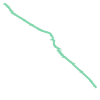

In [34]:
line_string =i24['line string'][0]
line_string

In [35]:
folium.GeoJson(line_string).add_to(test_map)

In [36]:
test_map

In [37]:
i24line = i24['line string'][0]

In [42]:
# i24.to_csv('i24.csv')